<a href="https://colab.research.google.com/github/saubhagyamaurya/MachineLearning/blob/main/SimpleLinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  
dataset = pd.read_csv("50_Startups.csv")
print(dataset)


    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

Encoding the categorical variable

In [5]:
dataset = pd.get_dummies(dataset,drop_first=True)
print(dataset)

    R&D Spend  Administration  ...  State_Florida  State_New York
0   165349.20       136897.80  ...              0               1
1   162597.70       151377.59  ...              0               0
2   153441.51       101145.55  ...              1               0
3   144372.41       118671.85  ...              0               1
4   142107.34        91391.77  ...              1               0
5   131876.90        99814.71  ...              0               1
6   134615.46       147198.87  ...              0               0
7   130298.13       145530.06  ...              1               0
8   120542.52       148718.95  ...              0               1
9   123334.88       108679.17  ...              0               0
10  101913.08       110594.11  ...              1               0
11  100671.96        91790.61  ...              0               0
12   93863.75       127320.38  ...              1               0
13   91992.39       135495.07  ...              0               0
14  119943

In [6]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State_Florida    50 non-null     uint8  
 5   State_New York   50 non-null     uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.8 KB


Independent Variable

In [8]:
X = dataset.iloc[:,[0,1,2,4,5]].values
print(X.shape)

(50, 5)


Dependent Variable

In [9]:
y = dataset.iloc[:,3].values
print(y.shape)

(50,)


Taking Care of missing Value

In [10]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
X = si.fit_transform(X)

Splitting the dataset into train and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = 42)

Fitting MRL to the Training dataset

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

Pridicting on the test dataset

In [13]:
y_pred  = regressor.predict(X_test)

Plot the graph

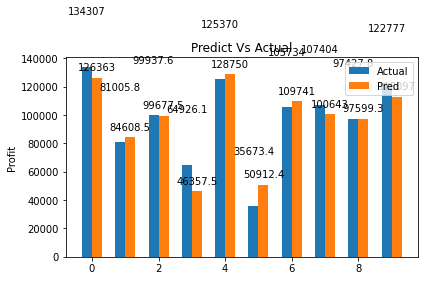

In [20]:
import matplotlib.pyplot as plt
x = np.arange(len(y_test))
width = 0.30

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, y_test, width, label = 'Actual')
rects2 = ax.bar(x+width/2, y_pred, width, label = 'Pred')

ax.set_ylabel('Profit')
ax.set_title('Predict Vs Actual')
ax.legend()   

ax.bar_label(rects1,padding = 5)
ax.bar_label(rects2,padding = 5)

fig.tight_layout()
plt.show()


In [15]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [16]:
!pip install matplotlib=='3.5.1'